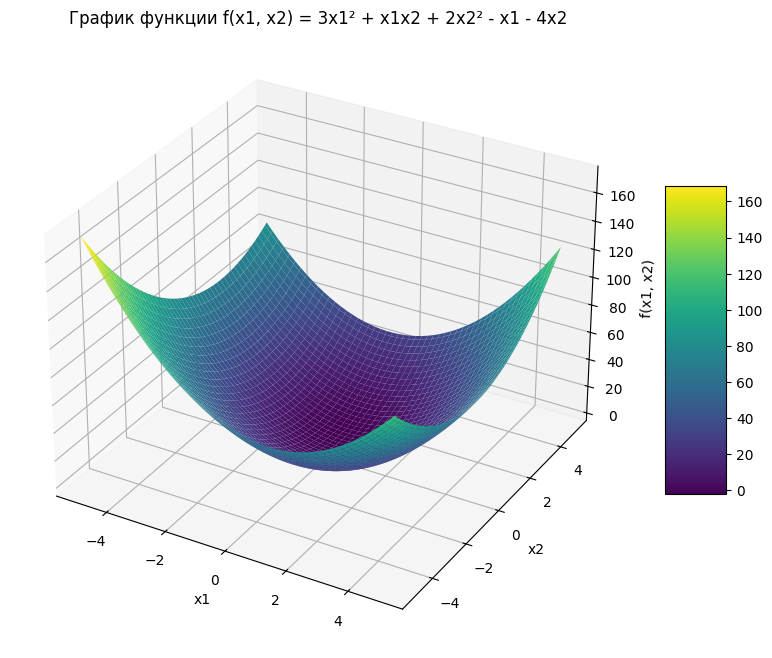

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определение функции
def f(x1, x2):
    return 3 * x1**2 + x1 * x2 + 2 * x2**2 - x1 - 4 * x2

# Создание сетки значений x1 и x2
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Построение 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('График функции f(x1, x2) = 3x1² + x1x2 + 2x2² - x1 - 4x2')

# Добавление цветовой шкалы
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

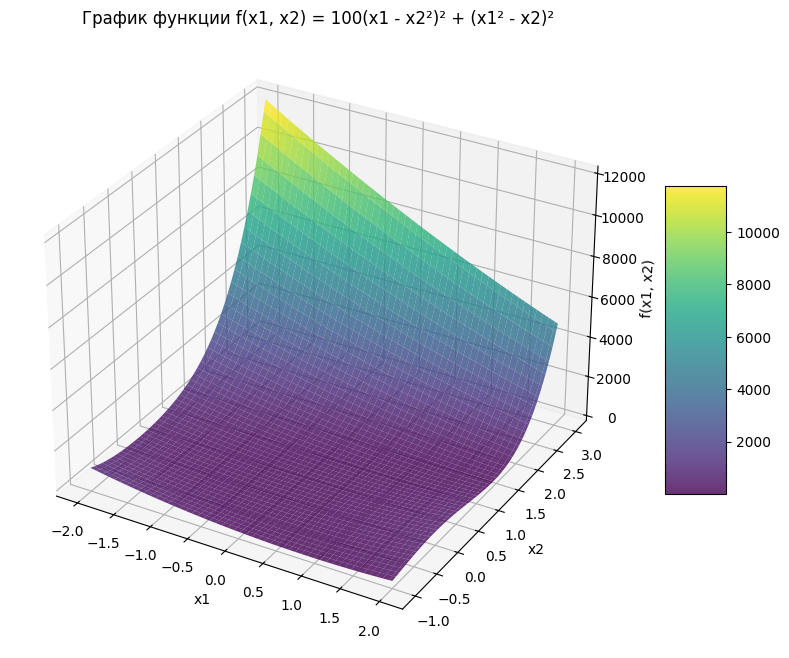

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определение функции
def f(x1, x2):
    return 100 * (x1 - x2**2)**2 + (x1**2 - x2)**2

# Создание сетки значений x1 и x2
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Построение 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('График функции f(x1, x2) = 100(x1 - x2²)² + (x1² - x2)²')

# Добавление цветовой шкалы
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

Найденный минимум: x1 = 0.000010, x2 = 0.999976
Значение функции в минимуме: -2.000000
Количество итераций: 287


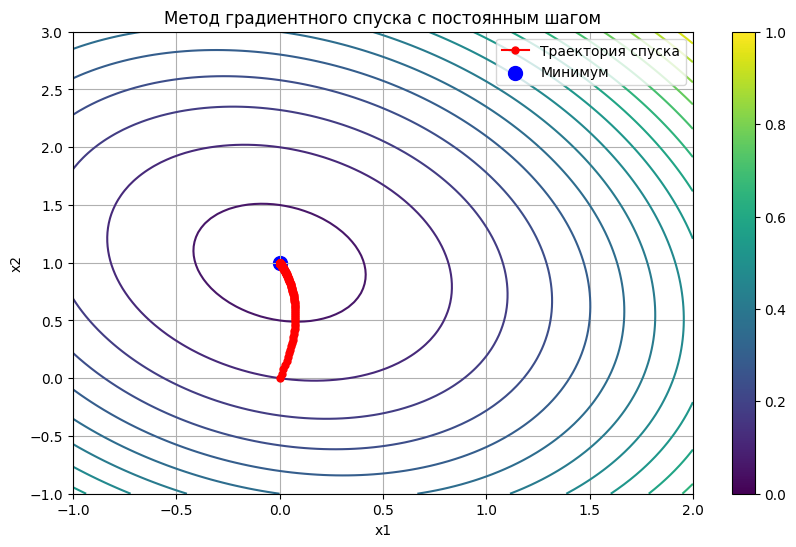

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    return 3 * x1**2 + x1 * x2 + 2 * x2**2 - x1 - 4 * x2

def gradient(x1, x2):
    df_dx1 = 6 * x1 + x2 - 1 
    df_dx2 = x1 + 4 * x2 - 4 
    return np.array([df_dx1, df_dx2])

def gradient_descent(start_point, learning_rate, max_iterations, tolerance):
    path = [start_point]
    x = np.array(start_point, dtype=float)
    
    for _ in range(max_iterations):
        grad = gradient(x[0], x[1])
        x_new = x - learning_rate * grad
        
        path.append(x_new.copy())
        
        
        if np.linalg.norm(grad) < tolerance:
            break
        
        x = x_new
    
    return np.array(path), len(path) - 1 


start_point = [0, 0]  
learning_rate = 0.01  
max_iterations = 1000 
tolerance = 1e-4

path, num_iterations = gradient_descent(start_point, learning_rate, max_iterations, tolerance)
minimum_point = path[-1]
minimum_value = f(minimum_point[0], minimum_point[1])


print(f"Найденный минимум: x1 = {minimum_point[0]:.6f}, x2 = {minimum_point[1]:.6f}")
print(f"Значение функции в минимуме: {minimum_value:.6f}")
print(f"Количество итераций: {num_iterations}")

# Визуализация траектории спуска
x1_vals = np.linspace(-1, 2, 100)
x2_vals = np.linspace(-1, 3, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f(X1, X2)

plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.plot(path[:, 0], path[:, 1], 'r.-', markersize=10, label='Траектория спуска')
plt.scatter(minimum_point[0], minimum_point[1], c='blue', s=100, label='Минимум')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Метод градиентного спуска с постоянным шагом')
plt.legend()
plt.colorbar()
plt.grid()
plt.show()

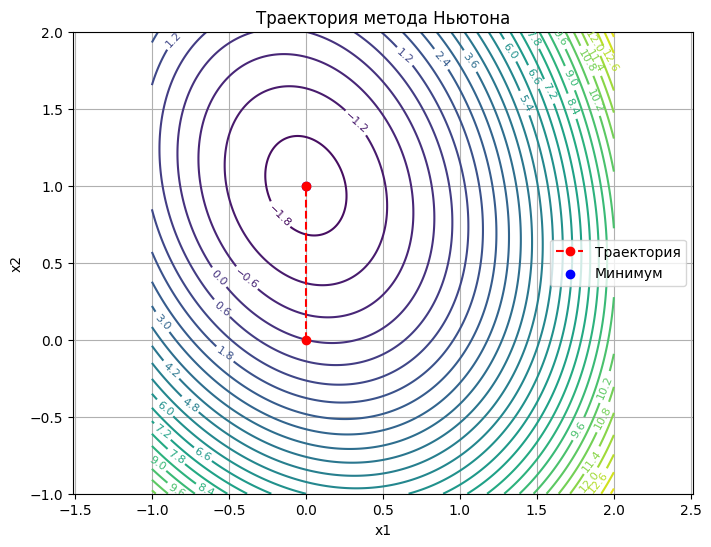

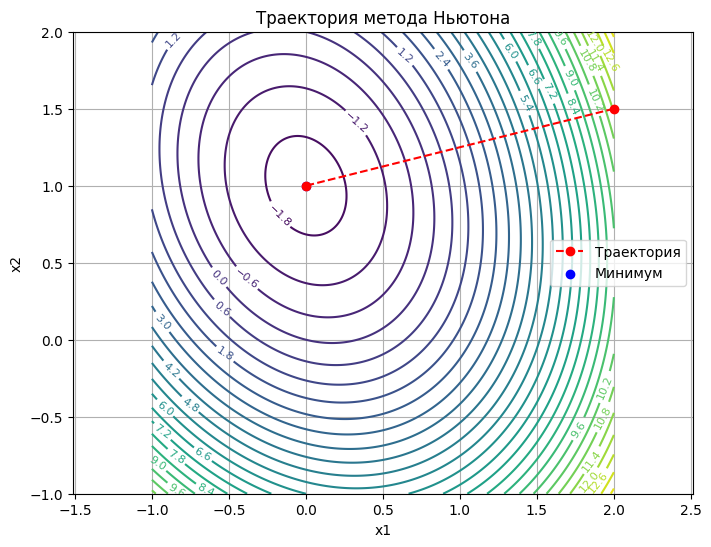

Точка минимума: [9.92786073e-06 9.99976027e-01]
Значение функции в минимуме: -1.9999999987928663


In [5]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    x1, x2 = x
    return 3*x1**2 + x1*x2 + 2*x2**2 - x1 - 4*x2


def grad_f(x):
    x1, x2 = x
    return np.array([6*x1 + x2 - 1, x1 + 4*x2 - 4])

def hessian_f(x):
    return np.array([[6, 1], [1, 4]])


def newton_with_trace(x0, epsilon=1e-6, alpha=0.4, beta=0.7):
    x = x0.copy()
    trace = [x.copy()]
    while np.linalg.norm(grad_f(x)) > epsilon:
        grad = grad_f(x)
        hess = hessian_f(x)
        p = -np.linalg.solve(hess, grad)
        t = 1
        while f(x + t * p) > f(x) + alpha * t * np.dot(grad, p):
            t *= beta
        x = x + t * p
        trace.append(x.copy())
    return x, f(x), trace


def plot_trajectory(trace):
    trace = np.array(trace)
    x_vals = np.linspace(-1, 2, 400)
    y_vals = np.linspace(-1, 2, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f([X, Y])

    plt.figure(figsize=(8, 6))
    contour = plt.contour(X, Y, Z, levels=30, cmap='viridis')
    plt.clabel(contour, inline=True, fontsize=8)
    plt.plot(trace[:, 0], trace[:, 1], 'ro--', label='Траектория')
    plt.scatter(trace[-1, 0], trace[-1, 1], c='blue', label='Минимум')
    plt.title('Траектория метода Ньютона')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


x0 = np.array([0.0, 0.0])
_, _, trace = newton_with_trace(x0)
plot_trajectory(trace)

x0 = np.array([2.0, 1.5])
_, _, trace = newton_with_trace(x0)
plot_trajectory(trace)
print("Точка минимума:", minimum_point)
print("Значение функции в минимуме:", minimum_value)


Отличный вопрос! Если в твоей реализации метода Ньютона количество итераций оказывается 1, но это кажется подозрительным — давай разберёмся, почему так происходит.

Что делает метод Ньютона?
Метод Ньютона — это метод второго порядка, который учитывает кривизну функции через гессиан. Он может сходиться за 1 итерацию, если:

Функция квадратична (а твоя — именно такая),

Гессиан постоянный и положительно определён (у нас так и есть),

Шаг t=1 сразу удовлетворяет условию Армихо.

Точка 1, старт [1.5 1.5], минимум: [1. 1.], f(x)=0.0, итераций: 4
Точка 2, старт [1.5 0. ], минимум: [-0. -0.], f(x)=0.0, итераций: 19
Точка 3, старт [2.5 0.5], минимум: [1. 1.], f(x)=0.0, итераций: 6
Точка 4, старт [-2.  2.], минимум: [-0. -0.], f(x)=0.0, итераций: 12
Точка 5, старт [ 2. -2.], минимум: [-0. -0.], f(x)=0.0, итераций: 7
Точка 6, старт [-2. -2.], минимум: [-0. -0.], f(x)=0.0, итераций: 6
Точка 7, старт [0.5 2.5], минимум: [1. 1.], f(x)=0.0, итераций: 6


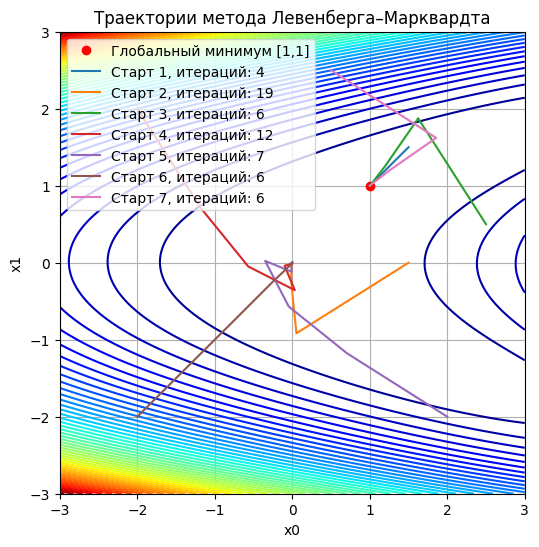

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def residuals(x):
    return np.array([
        np.sqrt(100) * (x[0] - x[1]**2),
        x[0]**2 - x[1]
    ])

def jacobian(x):
    x0, x1 = x
    return np.array([
        [np.sqrt(100), -2 * np.sqrt(100) * x1],
        [2 * x0, -1]
    ])

def f(x):
    return 100*(x[0] - x[1]**2)**2 + (x[0]**2 - x[1])**2

def levenberg_marquardt_adaptive(x0, tol=1e-6, max_iter=100, lambda_init=0.01):
    x = x0.copy()
    lambd = lambda_init
    iters = 0
    trajectory = [x.copy()]

    for _ in range(max_iter):
        r = residuals(x)
        J = jacobian(x)
        JTJ = J.T @ J
        grad = J.T @ r
        H = JTJ + lambd * np.eye(2)
        step = np.linalg.solve(H, grad)

        if np.linalg.norm(step) < tol:
            break

        x_new = x - step
        if f(x_new) < f(x):
            x = x_new
            lambd *= 0.8  # успешный шаг → уменьшаем λ
        else:
            lambd *= 2.0  # неудачный шаг → увеличиваем λ

        trajectory.append(x.copy())
        iters += 1

    return x, f(x), iters, np.array(trajectory)


start_points = [
    np.array([1.5, 1.5]),
    np.array([1.5, 0]),
    np.array([2.5, 0.5]),
    np.array([-2.0, 2.0]),
    np.array([2.0, -2.0]),
    np.array([-2.0, -2.0]),
    np.array([0.5, 2.5])
]

# График и результаты
fig, ax = plt.subplots(figsize=(6, 6))
x_vals = np.linspace(-3, 3, 1000)
y_vals = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

ax.contour(X, Y, Z, levels=50, cmap='jet')
ax.plot(1, 1, 'ro', label='Глобальный минимум [1,1]')

for i, start in enumerate(start_points):
    result, fval, iterations, traj = levenberg_marquardt_adaptive(start)
    ax.plot(traj[:, 0], traj[:, 1], label=f'Старт {i+1}, итераций: {iterations}')
    print(f"Точка {i+1}, старт {start}, минимум: {result.round()}, f(x)={fval}, итераций: {iterations}")

ax.set_title("Траектории метода Левенберга–Марквардта")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.legend()
plt.grid(True)
plt.show()
